In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np

from collections import Counter
from imblearn.combine import SMOTETomek

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, roc_auc_score, balanced_accuracy_score

from sklearn.ensemble import RandomForestClassifier

   int_corr     age_o    attr_o       age  ...  dec_o  imprelig  goal  date
0  0.557471  0.243243  0.571429  0.081081  ...      0       4.0   2.0   7.0
1  0.787356  0.108108  0.666667  0.081081  ...      0       4.0   2.0   7.0
2  0.568966  0.108108  0.952381  0.081081  ...      1       4.0   2.0   7.0
3  0.827586  0.135135  0.666667  0.081081  ...      1       4.0   2.0   7.0
4  0.597701  0.162162  0.761905  0.081081  ...      1       4.0   2.0   7.0

[5 rows x 31 columns]


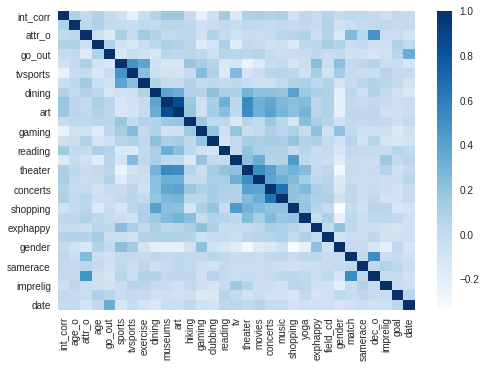

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Master/Anul 1/Semestrul 1/Exploratory Data Analysis/Proiect/processed.csv", error_bad_lines=False)

plt.style.use('seaborn')

Y = data['match']
X = data[['int_corr', 'age_o', 'attr_o', 'age', 'go_out', 'sports', 'tvsports', 'exercise',
 'dining', 'museums', 'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv',
 'theater', 'movies', 'concerts', 'music', 'shopping', 'yoga', 'exphappy',
 'field_cd', 'gender', 'samerace', 'dec_o', 'imprelig', 'goal', 'date']]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, shuffle = True, random_state = 42)

data.drop('field_cd.1', inplace=True, axis=1)

print(data.head(5))

cor = data.corr()
sns.heatmap(cor, cmap=plt.cm.Blues)
plt.show( )

data.drop('match', inplace=True, axis=1)

In [ ]:
# parameters = {
#             'n_estimators': [trees for trees in range(400, 501, 50)],
#             'max_depth': [depth for depth in range(15, 25, 1)]
#         }

# model = RandomForestClassifier(random_state=42)

# clf = GridSearchCV(
#     model, parameters, scoring = "f1", verbose = 10, n_jobs = -1, cv = 5
# )

# clf.fit(X_train, Y_train)

# print("Best parameters: \n")
# print(clf.best_params_)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   18.2s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   27.5s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:   42.3s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   55.2s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done  94 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 109 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed:  4

Best parameters: 

{'max_depth': 20, 'n_estimators': 500}


In [ ]:
randomForest = RandomForestClassifier(            
            bootstrap=True, class_weight=None,
            criterion='gini', max_depth=20, max_features='auto',
            max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500,
            n_jobs=None, oob_score=False, random_state=42, verbose=0,
            warm_start=False)

randomForest.fit(X_train, Y_train)

Y_pred=randomForest.predict(X_test)

print("Accuracy:",balanced_accuracy_score(Y_test, Y_pred))
print('\n')
print(classification_report(Y_test, Y_pred))
print('\n')
print(classification_report_imbalanced(Y_test, Y_pred))

Accuracy: 0.6852754822706886


              precision    recall  f1-score   support

           0       0.89      0.93      0.91      1990
           1       0.55      0.44      0.49       391

    accuracy                           0.85      2381
   macro avg       0.72      0.69      0.70      2381
weighted avg       0.84      0.85      0.84      2381



                   pre       rec       spe        f1       geo       iba       sup

          0       0.89      0.93      0.44      0.91      0.64      0.43      1990
          1       0.55      0.44      0.93      0.49      0.64      0.39       391

avg / total       0.84      0.85      0.52      0.84      0.64      0.42      2381



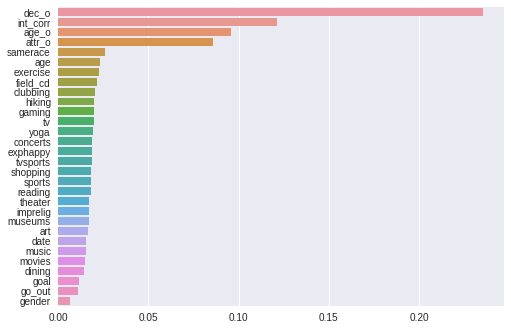

In [ ]:
features = pd.Series(randomForest.feature_importances_, index = data.columns.values).sort_values(ascending=False)

sns.barplot(x=features, y=features.index)

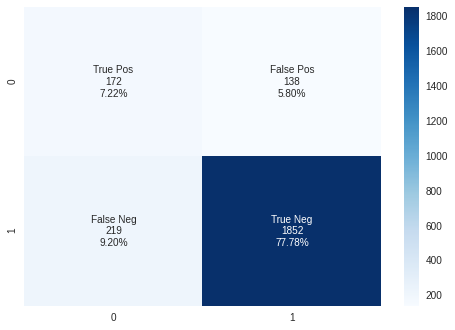

In [ ]:
cm_i = confusion_matrix(Y_test, Y_pred)  
cm = cm_i.copy()

cm[0][0] = cm_i[1][1]
cm[1][1] = cm_i[0][0]

groups = ['True Pos' ,'False Pos','False Neg', 'True Neg']
counter = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{g}\n{c}\n{p}" for g, c, p in
          zip(groups ,counter,percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

ROC-AUC Score:
0.892577979411122


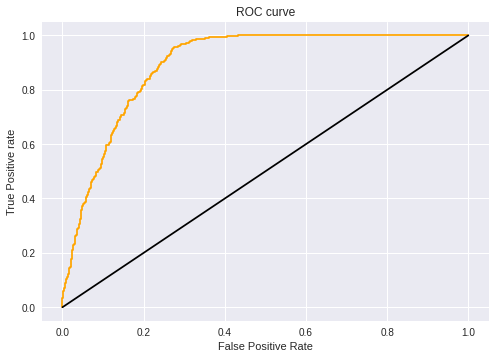

In [ ]:
predict_prob = randomForest.predict_proba(X_test)[:,1]

fpr, tpr, threshold = roc_curve(Y_test, predict_prob, pos_label=1)

random_probs = [0 for i in range(len(Y_test))]
p_fpr, p_tpr, _ = roc_curve(Y_test, random_probs, pos_label=1)

plt.style.use('seaborn')
plt.plot(fpr, tpr, color='orange')
plt.plot(p_fpr, p_tpr, color='black')

plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')

print("ROC-AUC Score:")
print(roc_auc_score(Y_test, predict_prob))

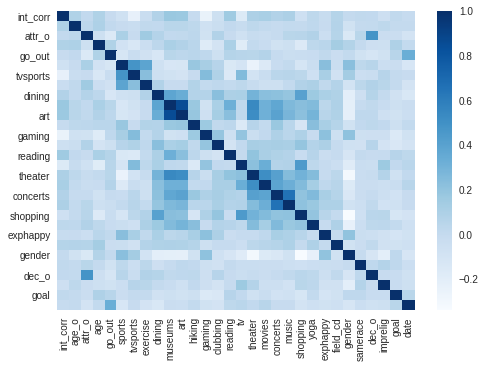

In [ ]:
train = pd.read_csv("/content/drive/MyDrive/Master/Anul 1/Semestrul 1/Exploratory Data Analysis/Proiect/train_poly.csv", error_bad_lines=False)
test = pd.read_csv("/content/drive/MyDrive/Master/Anul 1/Semestrul 1/Exploratory Data Analysis/Proiect/test_poly.csv", error_bad_lines=False)

plt.style.use('seaborn')

Y_train = train['match']
Y_test = test['match']

cor = data.corr()
sns.heatmap(cor, cmap=plt.cm.Blues)
plt.show()

train.drop('match', inplace=True, axis=1)
test.drop('match', inplace=True, axis=1)

In [ ]:
# parameters = {
#             'n_estimators': [trees for trees in range(650, 751, 50)],
#             'max_depth': [depth for depth in range(30, 51, 10)]
#         }

# model = RandomForestClassifier(random_state=42)

# clf = GridSearchCV(
#     model, parameters, scoring = "f1", verbose = 10, n_jobs = -1, cv = 5
# )

# clf.fit(X_train, Y_train)

# print("Best parameters: \n")
# print(clf.best_params_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    8.0s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   16.1s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   41.4s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:  3.3min finished


Best parameters: 

{'max_depth': 40, 'n_estimators': 700}


In [ ]:
randomForest = RandomForestClassifier(            
            bootstrap=True, class_weight=None,
            criterion='gini', max_depth=40, max_features='auto',
            max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=700,
            n_jobs=None, oob_score=False, random_state=42, verbose=0,
            warm_start=False)

randomForest.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=40, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=700,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
Y_pred=randomForest.predict(X_test)

print("Accuracy:",balanced_accuracy_score(Y_test, Y_pred))
print('\n')
print(classification_report(Y_test, Y_pred))

print(Y_pred)
print(Y_test.to_numpy())

Accuracy: 0.5026616538329072


              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1979
           1       0.19      0.05      0.08       402

    accuracy                           0.80      2381
   macro avg       0.51      0.50      0.48      2381
weighted avg       0.72      0.80      0.75      2381

[0 0 0 ... 0 1 0]
[0 0 0 ... 0 0 0]


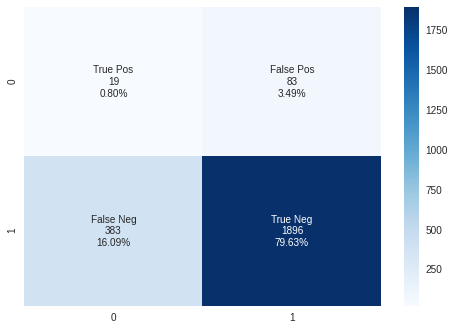

In [ ]:
cm_i = confusion_matrix(Y_test, Y_pred)  
cm = cm_i.copy()

cm[0][0] = cm_i[1][1]
cm[1][1] = cm_i[0][0]

groups = ['True Pos' ,'False Pos','False Neg', 'True Neg']
counter = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{g}\n{c}\n{p}" for g, c, p in
          zip(groups ,counter,percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

ROC-AUC Score:
0.512972027180922


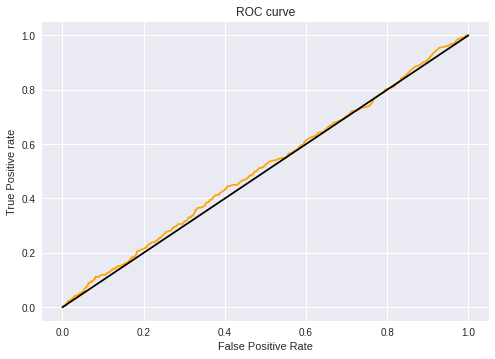

In [ ]:
predict_prob = randomForest.predict_proba(X_test)[:,1]

fpr, tpr, threshold = roc_curve(Y_test, predict_prob, pos_label=1)

random_probs = [0 for i in range(len(Y_test))]
p_fpr, p_tpr, _ = roc_curve(Y_test, random_probs, pos_label=1)

plt.style.use('seaborn')
plt.plot(fpr, tpr, color='orange')
plt.plot(p_fpr, p_tpr, color='black')

plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')

print("ROC-AUC Score:")
print(roc_auc_score(Y_test, predict_prob))

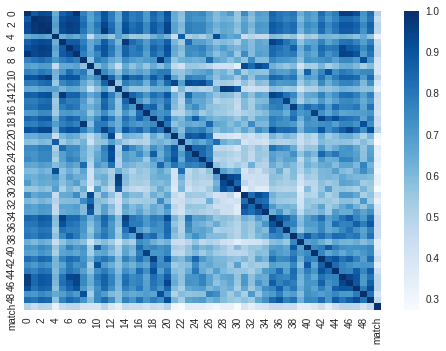

In [ ]:
train = pd.read_csv("/content/drive/MyDrive/Master/Anul 1/Semestrul 1/Exploratory Data Analysis/Proiect/test_smote.csv", error_bad_lines=False)
test = pd.read_csv("/content/drive/MyDrive/Master/Anul 1/Semestrul 1/Exploratory Data Analysis/Proiect/train_smote.csv", error_bad_lines=False)

plt.style.use('seaborn')

Y_train = train['match']
Y_test = test['match']

cor = train.corr()
sns.heatmap(cor, cmap=plt.cm.Blues)
plt.show()

train.drop('match', inplace=True, axis=1)
test.drop('match', inplace=True, axis=1)

In [ ]:
# parameters = {
#             'n_estimators': [trees for trees in range(1050, 1151, 50)],
#             'max_depth': [depth for depth in range(30, 51, 10)]
#         }

# model = RandomForestClassifier(random_state=42)

# clf = GridSearchCV(
#     model, parameters, scoring = "f1", verbose = 10, n_jobs = -1, cv = 5
# )

# clf.fit(train, Y_train)

# print("Best parameters: \n")
# print(clf.best_params_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   14.6s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   35.0s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   50.0s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:  2.6min finished


Best parameters: 

{'max_depth': 30, 'n_estimators': 1100}


In [ ]:
randomForest = RandomForestClassifier(            
            bootstrap=True, class_weight=None,
            criterion='gini', max_depth=30, max_features='auto',
            max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1100,
            n_jobs=None, oob_score=False, random_state=42, verbose=0,
            warm_start=False)

randomForest.fit(train, Y_train)

Y_pred=randomForest.predict(test)

print("Accuracy:",accuracy_score(Y_test, Y_pred))
print('\n')
print(classification_report(Y_test, Y_pred))

Accuracy: 0.6672248269703058


              precision    recall  f1-score   support

           0       0.61      0.93      0.74      4479
           1       0.85      0.41      0.55      4479

    accuracy                           0.67      8958
   macro avg       0.73      0.67      0.64      8958
weighted avg       0.73      0.67      0.64      8958



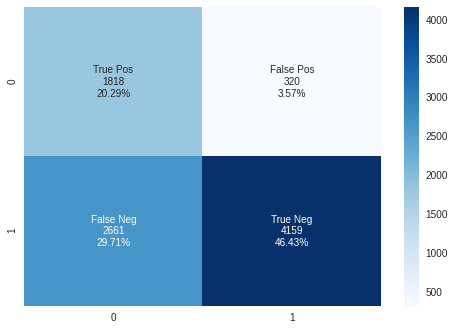

In [ ]:
cm_i = confusion_matrix(Y_test, Y_pred)  
cm = cm_i.copy()

cm[0][0] = cm_i[1][1]
cm[1][1] = cm_i[0][0]

groups = ['True Pos' ,'False Pos','False Neg', 'True Neg']
counter = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{g}\n{c}\n{p}" for g, c, p in
          zip(groups ,counter,percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

ROC-AUC Score:
0.900474148392431


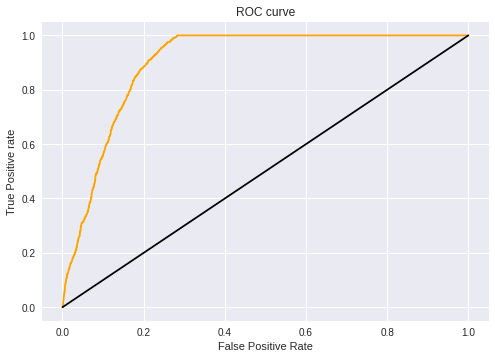

In [ ]:
predict_prob = randomForest.predict_proba(test)[:,1]

fpr, tpr, threshold = roc_curve(Y_test, predict_prob, pos_label=1)

random_probs = [0 for i in range(len(Y_test))]
p_fpr, p_tpr, _ = roc_curve(Y_test, random_probs, pos_label=1)

plt.style.use('seaborn')
plt.plot(fpr, tpr, color='orange')
plt.plot(p_fpr, p_tpr, color='black')

plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')

print("ROC-AUC Score:")
print(roc_auc_score(Y_test, predict_prob))